# Introdução à Ciência dos Dados &mdash; Projeto Final

Alunos: Artur Franco (anf), Lucas Glasner (lgr3)

## 2 &mdash; Análise exploratória dos dados

A análise exploratória dos dados (AED) é um passo importante, como todos os outros, na área de `Data Science`, e pode ser feita utilizando algum tipo de estatística descritiva ou análise de gráficos, com o intuito de se familiarizar com os dados e entender melhor sobre a natureza dos mesmos. Através da AED, nós buscamos confirmar hipóteses, ou seja, obter resposta para algumas perguntas previamente pensadas, como por exemplo: 
1. É mais provável ocorrerem acidentes de trânsito em bairros de classe mais baixa?
* É mais provável ocorrerem acidentes de trânsito no horário da noite?
* É mais provável ocorrerem infrações de trânsito no horário da noite?
* Para a maioria dos acidentes foi registrada uma infração?
* O registro de infrações ajuda a diminuir a quantidade de acidentes?

Nós não obtivemos resposta clara para a pergunta 4, uma vez que pela natureza do problema real e do próprio `dataset`, não encontramos uma maneira para tal. Já para as perguntas 1, 2, 3 e 5 obtivemos as respostas que irão ser vistas no decorrer deste `notebook`. Buscamos ainda detectar novas hipóteses, as quais poderão ser vistas também no decorrer deste `notebook`.

Para realizar a análise exploratória dos dados foram utilizadas alguns recursos disponíveis para `Python`. Foram  elas: a biblioteca `pandas` (para tratamento e análise de dados) e o pacote `pyplot` da biblioteca `matplotlib` (para visualização de gráficos).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

% matplotlib inline

### 2.1 &mdash; Análise exploratória dos dados sobre acidentes de trânsito

In [2]:
# Lendo datasets tratados
acidentes2016 = pd.read_csv('treated-datasets/acidentes-2016.csv', sep=',', index_col=0)
acidentes2015 = pd.read_csv('treated-datasets/acidentes-2015.csv', sep=',', index_col=0)

print('-----ACIDENTES DE TRÂNSITO EM RECIFE/2016-----')
display(acidentes2016.head())
print(' ')
print('-----ACIDENTES DE TRÂNSITO EM RECIFE/2015-----')
display(acidentes2015.head())

-----ACIDENTES DE TRÂNSITO EM RECIFE/2016-----


,data,hora,endereco,bairro,natureza,tipo
0,2016-01-01,00:58,Av Jornalista Possidonio Cavalcanti Bastos,Iputinga,COLISÃO,SEM VÍTIMA
1,2016-01-01,01:23,Av Engenheiro Domingos Ferreira,Boa Viagem,COLISÃO,SEM VÍTIMA
2,2016-01-01,01:42,Rua Dr Alvaro Ferraz,Jordão,COLISÃO,SEM VÍTIMA
3,2016-01-01,03:08,Av Jornalista Costa Porto,Ibura,COLISÃO,SEM VÍTIMA
4,2016-01-01,05:34,Av Governador Agamenon Magalhaes,Paissandu,CHOQUE,COM VÍTIMA


 
-----ACIDENTES DE TRÂNSITO EM RECIFE/2015-----


,data,hora,endereco,bairro,natureza,tipo
0,2015-12-03,11:36,Av Norte,Casa Amarela,COLISÃO,SEM VÍTIMA
1,2015-06-01,06:35,Est De Belem,Encruzilhada,COLISÃO,SEM VÍTIMA
2,2015-06-01,08:04,Rua Ernesto De Paula Santos,Boa Viagem,COLISÃO,SEM VÍTIMA
3,2015-06-01,08:06,Av Sul,Afogados,COLISÃO,SEM VÍTIMA
4,2015-06-01,08:13,Rua Benfica,Madalena,COLISÃO,SEM VÍTIMA


Analisando os conjuntos de dados sobre acidentes, percebemos que para o ano de 2016 só há dados de 10 meses (Janeiro à Outubro) e para o ano de 2015 só há dados de 7 meses (Junho à Dezembro). Para fazer uma estimativa da quantidade total de acidentes nos anos de 2015 e 2016, completamos os meses inexistentes nos `datasets` com a média da quantidade de acidentes em cada ano, calculada apenas para os meses existentes nos `datasets`. Veremos uma explicação mais detalhada:  

- No ano de 2015 ocorreram 7169 acidentes em 7 meses (Junho à Dezembro), com média de cerca de 1024 acidentes por mês. Nós supusemos então que a quantidade de acidentes em cada mês restante (Janeiro, Fevereiro, Março, Abril e Maio) foi 1024, então uma boa estimativa para a quantidade total de acidentes em 2015 (agora considerando os 12 meses do ano) seria $7169 + 1024*5$ (5 é a quantidade de meses restantes), que é o equivalente a 12889 acidentes. Nós armazenamos esse valor na variável `totalAcidentes2015`.
- No ano de 2016 ocorreram 9130 acidentes em 10 meses (Janeiro à Outubro), com média de 913 acidentes por mês. Nós supusemos então que a quantidade de acidentes em cada mês restante (Novembro e Dezembro) foi 913, então uma boa estimativa para a quantidade total de acidentes em 2016 (agora considerando os 12 meses do ano) seria $9130 + 913*2$ (2 é a quantidade de meses restantes), que é o equivalente a 10956 acidentes. Nós armazenamos esse valor na variável `totalAcidentes2016`.

In [3]:
# Quantidade de acidentes de trânsito registrados em 2015 e 1026
print('De acordo com os dados...')
print('{} acidentes de trânsito foram registrados na cidade do Recife em 2015 (Entre Junho e Dezembro)'.format(acidentes2015.shape[0]))
print('{} acidentes de trânsito foram registrados na cidade do Recife em 2016 (Entre Janeiro e Outubro)'.format(acidentes2016.shape[0]))

print(' ')

# Considerando os 12 meses do ano
totalAcidentes2015 = 12889
totalAcidentes2016 = 10956

# Melhorando estimativa da quantidade de acidentes de trânsito registrados em 2015 e 1026
print('Considerando os 12 meses do ano...')
print('Estimativa: {} acidentes de trânsito ocorreram na cidade do Recife em 2015'.format(totalAcidentes2015))
print('Estimativa: {} acidentes de trânsito ocorreram na cidade do Recife em 2016'.format(totalAcidentes2016))

print(' ')

crescimento = totalAcidentes2016 - totalAcidentes2015
porcentagem_crescimento = round((crescimento*100)/totalAcidentes2015,2)
print('Decaimento de cerca de {}% no número de acidentes de trânsito em Recife'.format(abs(porcentagem_crescimento)))

De acordo com os dados...
7169 acidentes de trânsito foram registrados na cidade do Recife em 2015 (Entre Junho e Dezembro)
9130 acidentes de trânsito foram registrados na cidade do Recife em 2016 (Entre Janeiro e Outubro)
 
Considerando os 12 meses do ano...
Estimativa: 12889 acidentes de trânsito ocorreram na cidade do Recife em 2015
Estimativa: 10956 acidentes de trânsito ocorreram na cidade do Recife em 2016
 
Decaimento de cerca de 15.0% no número de acidentes de trânsito em Recife


Surpreendentemente, na análise acima não houve um crescimento no número de acidentes registrados no Recife, entre 2015 e 2016.

Diante de toda a questão explicada anteriormente, de não haver dados para todos os meses dos anos de 2015 e 2016, fizemos o seguinte: Juntamos os dois `datasets` (`acidentes2015` e `acidentes2016`) em um só `dataset`, como pode ser visto na célula abaixo. Fizemos isso pois temos agora um intervalo maior de tempo e uma quantidade maior de dados, isto é, podemos agora analisar conjuntamente dados de acidentes desde Junho de 2015 até Outubro de 2016, nos dando um intervalo de 17 meses, o que pode ser melhor aproveitado do que se fôssemos analisar separadamente o dados de acidentes de 2015 (7 meses) e de 2016 (10 meses), pois do segundo modo, inviabilizaria até algum tipo de comparação entre os dados, já que não teríamos um padrão.

Então, vamos descobrir abaixo quais são os 10 bairros do Recife onde mais ocorreram acidentes de trânsito, entre Junho de 2015 e Outubro de 2016.

---BAIRRO ONDE OCORRERAM MAIS ACIDENTES (Jun/15 ~ Out/16)---
=> Boa Viagem - 2240 (ou 13.74% dos) acidentes
 


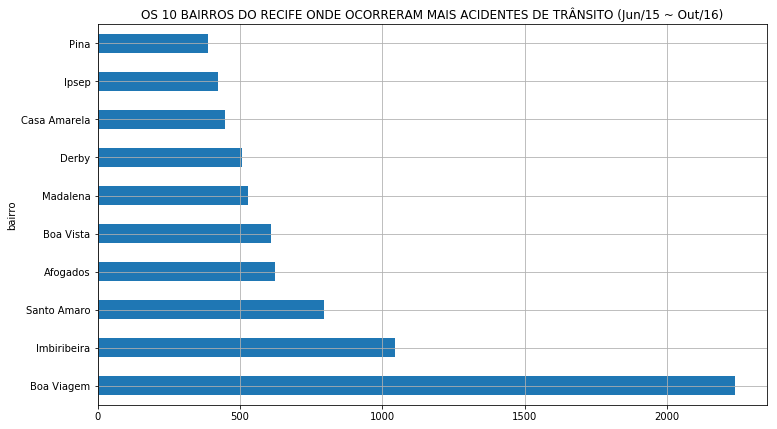

In [4]:
# Concatenando dataframes
acidentesTotal = pd.concat([acidentes2016, acidentes2015], axis=0)

# PLOT
top10_bairros = acidentesTotal.groupby('bairro').size().sort_values(ascending=False)[:10]
top10_bairros.plot.barh(title='OS 10 BAIRROS DO RECIFE ONDE OCORRERAM MAIS ACIDENTES DE TRÂNSITO (Jun/15 ~ Out/16)',
                        grid=True, figsize=(12,7))

# Cálculo de MODA
# Bairro onde mais ocorreu acidentes dentro dos 17 meses (Jun/2015 a Out/2016)
bairro_moda = acidentesTotal.bairro.mode()[0]
qtd_bairro = acidentesTotal.groupby('bairro').size().sort_values(ascending=False)[0]

# Calculando porcentagem
pct_bairro = round(qtd_bairro*100.0/acidentesTotal.shape[0], 2)

print('---BAIRRO ONDE OCORRERAM MAIS ACIDENTES (Jun/15 ~ Out/16)---')
print('=> {} - {} (ou {}% dos) acidentes'.format(bairro_moda, qtd_bairro, pct_bairro))
print(' ')

#### Respondendo a pergunta 1

É mais provável ocorrerem acidentes de trânsito em bairros de classe mais baixa?

Não necessariamente. Na análise acima pudemos descobrir que o bairro onde ocorrem mais acidentes de trânsito é Boa Viagem, que é um bairro de classe média-alta. Isso se deve também à Boa Viagem ser disparado o bairro do Recife com maior número de habitantes, além de possuir três Avenidas longas e movimentadas (Av. Engenheiro Domingos Ferreira, Av. Conselheiro Aguiar e Av. Boa Viagem).

Da mesma forma, veremos quais são os 10 logradouros do Recife onde mais ocorreram acidentes de trânsito, entre Junho de 2015 e Outubro de 2016.

---LOGRADOURO ONDE MAIS OCORRERAM ACIDENTES (Jun/2015 ~ Out/2016)---
=> Av Marechal Mascarenhas De Moraes - 711 (ou 4.36% dos) acidentes


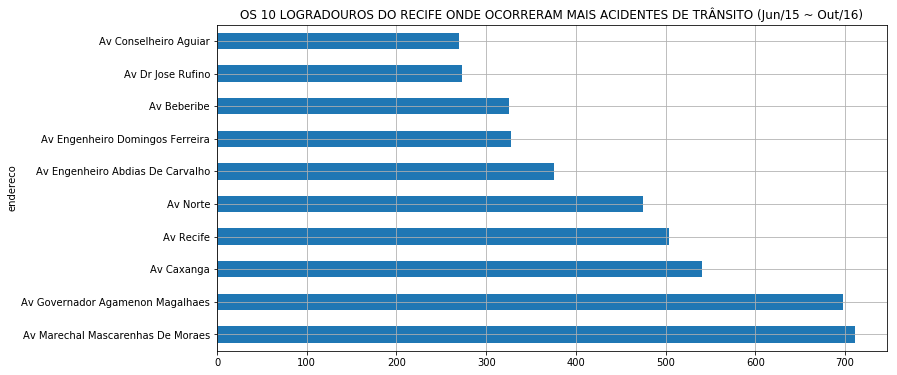

In [5]:
# PLOT
top10_enderecos = acidentesTotal.groupby('endereco').size().sort_values(ascending=False)[:10]
top10_enderecos.plot.barh(title='OS 10 LOGRADOUROS DO RECIFE ONDE OCORRERAM MAIS ACIDENTES DE TRÂNSITO (Jun/15 ~ Out/16)',
                        grid=True, figsize=(12,6))

# Cálculo de MODA
# Logradouro onde mais ocorreu acidentes dentro dos 17 meses (Jun/2015 a Out/2016)
endereco_moda = acidentesTotal.endereco.mode()[0]
qtd_endereco = acidentesTotal.groupby('endereco').size().sort_values(ascending=False)[0]

# Calculando porcentagem
pct_endereco = round(qtd_endereco*100.0/acidentesTotal.shape[0], 2)

print('---LOGRADOURO ONDE MAIS OCORRERAM ACIDENTES (Jun/2015 ~ Out/2016)---')
print('=> {} - {} (ou {}% dos) acidentes'.format(endereco_moda, qtd_endereco, pct_endereco))

Apesar de Boa Viagem ser o bairro do Recife onde mais ocorreram acidentes entre Junho de 2015 e Outubro de 2016, os logradouros onde mais ocorreram acidentes nesse mesmo tempo não ficam em Boa Viagem. Na verdade são duas Avenidas as quais concentram um grande fluxo de carros na maior parte do dia, visto que são Avenidas que ligam e passam por partes importantes da cidade do Recife. No ranking visto no gráfico, dos logradouros que ficam em Boa Viagem vemos a Avenida Engenheiro Domingos Ferreira na 7ª colocação e a Avenida Conselheiro Aguiar apenas na 10ª colocação.

In [6]:
### FUNÇÕES AUXILIARES ###

# Input -> hora no padrão hh:mm 
# Return -> range ou intervalo na forma [hh, hh+1) no qual a hora de entrada está
def criaRangeHora(hora):
    h = hora[:2]
    if h[0] == '0':
        if h[1] == '9':
            return '[' + h + 'h, ' + str(int(h[:2])+1) + 'h)'
        else:
            return '[' + h + 'h, 0' + str(int(h[:2])+1) + 'h)'
    elif h[0] == '2':
        if h[1] == '3':
            return '[' + h + 'h, 00h)'
        else:
            return '[' + h + 'h, ' + str(int(h[:2])+1) + 'h)'
    else:
        return '[' + h + 'h, ' + str(int(h[:2])+1) + 'h)'

# Input -> hora no padrão hh:mm
# Return -> período do dia relativo à hora de entrada (manhã, tarde, noite, madrugada)
def periodoDoDia(hora):
    h = hora[:2]
    manha = ['06','07','08','09','10','11']
    tarde = ['12','13','14','15','16','17']
    noite = ['18','19','20','21','22','23']
    
    if h in manha:
        return 'manhã'
    elif h in tarde:
        return 'tarde'
    elif h in noite:
        return 'noite'
    else:
        return 'madrugada'

# Input -> data no padrão yy-mm-dd
# Return -> string referente ao mês da data de entrada
def retornaMes(data):
    mes = data.split('-')[1]
    
    if mes == '01':
        return 'Jan'
    elif mes == '02':
        return 'Fev'
    elif mes == '03':
        return 'Mar'
    elif mes == '04':
        return 'Abr'
    elif mes == '05':
        return 'Mai'
    elif mes == '06':
        return 'Jun'
    elif mes == '07':
        return 'Jul'
    elif mes == '08':
        return 'Ago'
    elif mes == '09':
        return 'Set'
    elif mes == '10':
        return 'Out'
    elif mes == '11':
        return 'Nov'
    else:
        return 'Dez'

Abaixo nós criamos algumas colunas extras nos `datasets` usando as funções auxiliares implementadas anteriormente. O objetivo disto é apenas facilitar na hora de visualizar os dados.

In [7]:
# Criando colunas extras
acidentes2016['range_hora'] = acidentes2016['hora'].apply(lambda x: criaRangeHora(x))
acidentes2016['periodo_dia'] = acidentes2016['hora'].apply(lambda x: periodoDoDia(x))
acidentes2016['mes'] = acidentes2016['data'].apply(lambda x: retornaMes(x))

acidentes2015['range_hora'] = acidentes2015['hora'].apply(lambda x: criaRangeHora(x))
acidentes2015['periodo_dia'] = acidentes2015['hora'].apply(lambda x: periodoDoDia(x))
acidentes2015['mes'] = acidentes2015['data'].apply(lambda x: retornaMes(x))

acidentesTotal['range_hora'] = acidentesTotal['hora'].apply(lambda x: criaRangeHora(x))
acidentesTotal['periodo_dia'] = acidentesTotal['hora'].apply(lambda x: periodoDoDia(x))

acidentes2016.head()

,data,hora,endereco,bairro,natureza,tipo,range_hora,periodo_dia,mes
0,2016-01-01,00:58,Av Jornalista Possidonio Cavalcanti Bastos,Iputinga,COLISÃO,SEM VÍTIMA,"[00h, 01h)",madrugada,Jan
1,2016-01-01,01:23,Av Engenheiro Domingos Ferreira,Boa Viagem,COLISÃO,SEM VÍTIMA,"[01h, 02h)",madrugada,Jan
2,2016-01-01,01:42,Rua Dr Alvaro Ferraz,Jordão,COLISÃO,SEM VÍTIMA,"[01h, 02h)",madrugada,Jan
3,2016-01-01,03:08,Av Jornalista Costa Porto,Ibura,COLISÃO,SEM VÍTIMA,"[03h, 04h)",madrugada,Jan
4,2016-01-01,05:34,Av Governador Agamenon Magalhaes,Paissandu,CHOQUE,COM VÍTIMA,"[05h, 06h)",madrugada,Jan


Mais abaixo podemos ver gráficos mostrando a quantidade de acidentes por mês em 2016 (primeiro gráfico), por horas do dia (segundo gráfico) e por período do dia (terceiro gráfico). O segundo e terceiro gráfico para o intervalo de tempo entre Junho de 2015 e Outubro de 2016. 

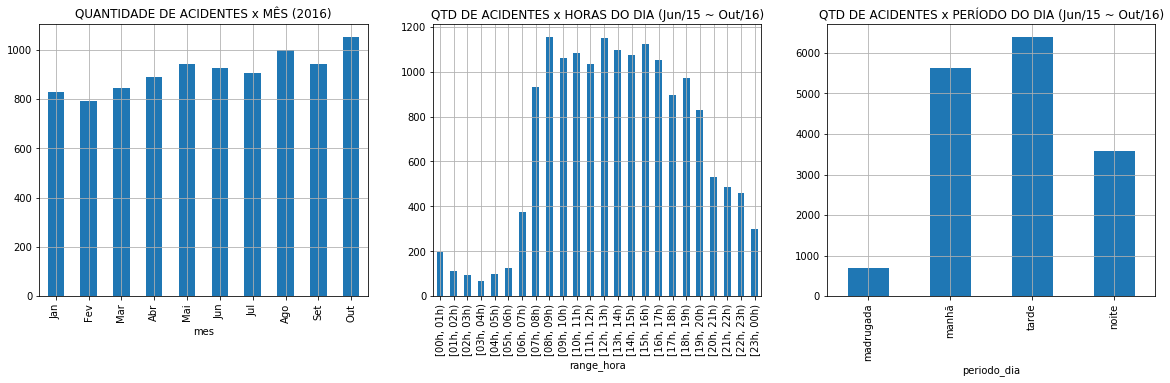

In [8]:
# Ordem dos valores no eixo x dos gráficos
meses = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out']
periodos = ['madrugada','manhã','tarde','noite']
horas = ['[00h, 01h)','[01h, 02h)','[02h, 03h)','[03h, 04h)','[04h, 05h)','[05h, 06h)','[06h, 07h)','[07h, 08h)',
        '[08h, 09h)','[09h, 10h)','[10h, 11h)','[11h, 12h)','[12h, 13h)','[13h, 14h)','[14h, 15h)','[15h, 16h)',
        '[16h, 17h)','[17h, 18h)','[18h, 19h)','[19h, 20h)','[20h, 21h)','[21h, 22h)','[22h, 23h)','[23h, 00h)']

# PLOTS
fig, ax = plt.subplots(ncols=3,figsize=(20,5))

# Para 2016
acidentesXmes2016 = acidentes2016.groupby('mes').size()
acidentesXmes2016 = acidentesXmes2016.reindex(meses)
acidentesXmes2016.plot.bar(title='QUANTIDADE DE ACIDENTES x MÊS (2016)', grid=True, ax=ax[0])

# Para Jun/2015 a Out/2016
acidentesXhoras = acidentesTotal.groupby('range_hora').size()
acidentesXhoras = acidentesXhoras.reindex(horas)
acidentesXhoras.plot.bar(title='QTD DE ACIDENTES x HORAS DO DIA (Jun/15 ~ Out/16)', grid=True, ax=ax[1])

# Para Jun/2015 a Out/2016
acidentesXperiodo = acidentesTotal.groupby('periodo_dia').size()
acidentesXperiodo = acidentesXperiodo.reindex(periodos)
acidentesXperiodo.plot.bar(title='QTD DE ACIDENTES x PERÍODO DO DIA (Jun/15 ~ Out/16)', grid=True, ax=ax[2])

#### Respondendo a pergunta 2

É mais provável ocorrerem acidentes de trânsito no horário da noite?

Não. Podemos observar no terceiro gráfico que a quantidade maior de acidentes ocorreram na parte da tarde, seguido pela parte da manhã, com uma certa superioridade com relação a quantidade de acidentes que ocorreram na parte da noite. No segundo gráfico podemos analisar a informação do terceiro gráfico com mais detalhes. Nota-se que a concentração maior de acidentes se dá no intervalo entre 7h e 20h, com picos nos seguintes intervalos:

- Entre 8h e 9h: acreditamos que isso se deve ao fato de que este é o horário onde a maioria das pessoas saem para trabalhar, o comércio começa a funcionar, entre outras coisas. Logo, há um grande aumento no fluxo de carros durante esse horário. 
- Entre 12h e 13h: acreditamos que isso se deve ao fato de que este é o horário onde grande parte das pessoas está no intervalo de almoço e é o horário no qual grande parte dos pais estão buscando seus filhos no colégio. Apenas esses dois fatos contribuem e muito para o aumento do fluxo de carros nas ruas durante esse horário.

OBS: Não conseguimos concluir nada olhando para o primeiro gráfico, visto que de um mês para outro é pouca a diferença da quantidade de acidentes.

### 2.2 &mdash; Análise exploratória dos dados sobre registros de infrações de trânsito

In [9]:
# Lendo datasets tratados
multas2016 = pd.read_csv('treated-datasets/infracoes-transito-2016.csv', sep=',', index_col=0)
multas2015 = pd.read_csv('treated-datasets/infracoes-transito-2015.csv', sep=',', index_col=0)

print('---REGISTROS DE INFRAÇÕES DE TRÂNSITO EM RECIFE/2016---')
display(multas2016.head())
print(' ')
print('---REGISTROS DE INFRAÇÕES DE TRÂNSITO EM RECIFE/2015---')
display(multas2015.head())

---REGISTROS DE INFRAÇÕES DE TRÂNSITO EM RECIFE/2016---


,data_infracao,hora_infracao,data_implantacao,agente_equipamento
0,2015-12-30,11:10,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL
1,2015-12-20,08:20,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL
2,2015-12-24,20:15,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL
3,2015-12-28,13:50,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL
4,2015-12-28,13:55,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL


 
---REGISTROS DE INFRAÇÕES DE TRÂNSITO EM RECIFE/2015---


,data_infracao,hora_infracao,data_implantacao,agente_equipamento
0,2015-10-26,08:42,2015-11-03,Código 6 - AUTOS NO TALÃO MANUAL
1,2015-10-26,08:45,2015-11-03,Código 6 - AUTOS NO TALÃO MANUAL
2,2015-10-26,08:48,2015-11-03,Código 6 - AUTOS NO TALÃO MANUAL
3,2015-10-26,08:55,2015-11-03,Código 6 - AUTOS NO TALÃO MANUAL
4,2015-10-26,09:10,2015-11-03,Código 6 - AUTOS NO TALÃO MANUAL


Para a análise dos dois conjuntos de dados referentes aos registros de infrações de trânsito, vimos que eles não apresentam o mesmo problema que os conjuntos de dados sobre acidentes, visto que possuem dados para todos os meses de 2015 e 2015, exceto que para o mês de dezembro do ano de 2016, a quantidade de infrações registradas é considerávelmente menor do que para os outros meses, mas isto não irá causar um grande impacto na nossa análise. Mesmo assim, decidirmos juntar os dois `datasets` (`multas2015` e `multas2016`), com o mesmo objetivo de quando fizemos isso para os dados sobre acidentes, que é o de poder trabalhar com mais dados e melhorar nossa análise. 

In [10]:
print('{} infrações de trânsito foram registradas na cidade do Recife em 2015'.format(multas2015.shape[0]))
print('{} infrações de trânsito foram registradas na cidade do Recife em 2016'.format(multas2016.shape[0]))

crescimento = multas2016.shape[0] - multas2015.shape[0]
porcentagem_crescimento = round((crescimento*100)/multas2015.shape[0],2)
print('OBS: Decaimento de {}% no número de infrações de trânsito registradas em Recife'.format(abs(porcentagem_crescimento)))

629158 infrações de trânsito foram registradas na cidade do Recife em 2015
570798 infrações de trânsito foram registradas na cidade do Recife em 2016
OBS: Decaimento de 9.28% no número de infrações de trânsito registradas em Recife


Resultado novamente surpreendente. Podemos ver que, de 2015 para 2016, não aconteceu um crescimento na quantidade de infrações registradas. Surpreendente pois sabemos que a quantidade de veículos nas ruas cresce à cada dia. Acho que as pessoas estão tendo mais consciência rsrsrs...

Abaixo nós criamos algumas colunas extras nos `datasets` usando as funções auxiliares implementadas anteriormente. O objetivo disto é apenas facilitar na hora de visualizar os dados.

In [11]:
# Criando colunas extras utilizando funções definidas previamente
multas2016['range_hora'] = multas2016['hora_infracao'].apply(lambda x: criaRangeHora(x))
multas2016['periodo_dia'] = multas2016['hora_infracao'].apply(lambda x: periodoDoDia(x))
multas2016['mes'] = multas2016['data_implantacao'].apply(lambda x: retornaMes(x))

multas2015['range_hora'] = multas2015['hora_infracao'].apply(lambda x: criaRangeHora(x))
multas2015['periodo_dia'] = multas2015['hora_infracao'].apply(lambda x: periodoDoDia(x))
multas2015['mes'] = multas2015['data_implantacao'].apply(lambda x: retornaMes(x))

multas2016.head()

,data_infracao,hora_infracao,data_implantacao,agente_equipamento,range_hora,periodo_dia,mes
0,2015-12-30,11:10,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL,"[11h, 12h)",manhã,Jan
1,2015-12-20,08:20,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL,"[08h, 09h)",manhã,Jan
2,2015-12-24,20:15,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL,"[20h, 21h)",noite,Jan
3,2015-12-28,13:50,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL,"[13h, 14h)",tarde,Jan
4,2015-12-28,13:55,2016-01-04,Código 6 - AUTOS NO TALÃO MANUAL,"[13h, 14h)",tarde,Jan


Abaixo podemos ver o meio que mais implantou multas em 2015/16.

In [12]:
# Concatenando dataframe de multas de 2015 e 2016
multasTotal = pd.concat([multas2016, multas2015], axis=0)

# Meio que mais implantou multas de trânsito (2015/16)
equip_moda = multasTotal.agente_equipamento.mode()[0]
qtd_equip = multasTotal.groupby('agente_equipamento').size().sort_values(ascending=False)[0]

# Calculando porcentagens
pct_equip = round(qtd_equip*100.0/multasTotal.shape[0], 2)

print('---MEIOS QUE MAIS IMPLANTARAM MULTAS (2015/16)---')
print('=> {} - {} (ou {}% das) infrações registradas'.format(equip_moda, qtd_equip, pct_equip))

---MEIOS QUE MAIS IMPLANTARAM MULTAS (2015/16)---
=> Código 3 - LOMBADA ELETRÔNICA - 562238 (ou 46.85% das) infrações registradas


A lombada eletrônica ganha disparado!!! De todas as infrações registradas no Recife em 2015/16, quase metade foram registradas pelas lombadas eletrônicas. Isso nos mostra que muita gente não respeita os limites de velocidade das vias. Por outro lado, se a maioria das pessoas respeitasse o limite de velocidade das vias, o número de infrações diminuiría bastante. Será que com mais lombadas eletrônicas as pessoas não acabam tendo que prestar mais atenção? Aumentar a quantidade de lombadas eletrônicas pode ser uma alternativa para melhorar o trânsito, já que respeitando o limite de velocidade das vias, há menor probabilidade de ocorrerem acidentes.

Mais abaixo podemos ver gráficos mostrando a quantidade de infrações implantadas por mês (primeiro gráfico), e a quantidade de infrações cometidas por horas do dia (segundo gráfico) e por período do dia (terceiro gráfico). O três gráficos mostram dados para os anos de 2015/16. 

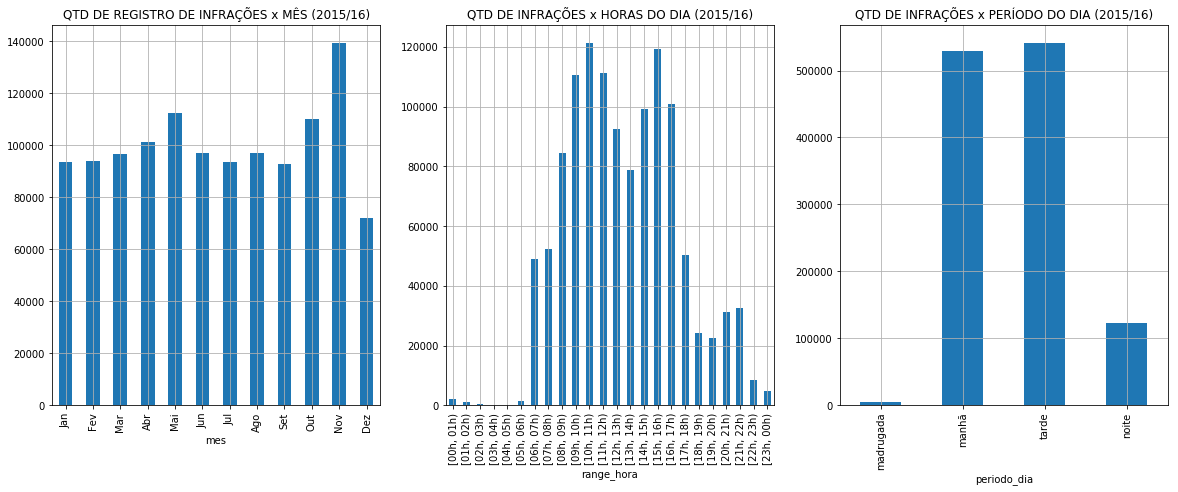

In [13]:
# Ordem dos valores no eixo x dos gráficos
meses = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
periodos = ['madrugada','manhã','tarde','noite']
horas = ['[00h, 01h)','[01h, 02h)','[02h, 03h)','[03h, 04h)','[04h, 05h)','[05h, 06h)','[06h, 07h)','[07h, 08h)',
        '[08h, 09h)','[09h, 10h)','[10h, 11h)','[11h, 12h)','[12h, 13h)','[13h, 14h)','[14h, 15h)','[15h, 16h)',
        '[16h, 17h)','[17h, 18h)','[18h, 19h)','[19h, 20h)','[20h, 21h)','[21h, 22h)','[22h, 23h)','[23h, 00h)']

# PLOTS
fig, ax = plt.subplots(ncols=3,figsize=(20,7))

multasXmes = multasTotal.groupby('mes').size()
multasXmes = multasXmes.reindex(meses)
multasXmes.plot.bar(title='QTD DE REGISTRO DE INFRAÇÕES x MÊS (2015/16)', grid=True, ax=ax[0])

multasXhoras = multasTotal.groupby('range_hora').size()
multasXhoras = multasXhoras.reindex(horas)
multasXhoras.plot.bar(title='QTD DE INFRAÇÕES x HORAS DO DIA (2015/16)', grid=True, ax=ax[1])

multasXperiodo = multasTotal.groupby('periodo_dia').size()
multasXperiodo = multasXperiodo.reindex(periodos)
multasXperiodo.plot.bar(title='QTD DE INFRAÇÕES x PERÍODO DO DIA (2015/16)', grid=True, ax=ax[2])

#### Respondendo a pergunta 3

É mais provável ocorrerem infrações de trânsito no horário da noite?

Não. Podemos observar no terceiro gráfico que a quantidade maior de infrações ocorreram na parte da tarde, seguido pela parte da manhã, com uma grande superioridade com relação a quantidade de infrações que ocorreram na parte da noite. No segundo gráfico podemos analisar a informação do terceiro gráfico com mais detalhes. Nota-se que a concentração maior de cometimento de infrações se dá no intervalo entre 8h e 17h, com picos nos seguintes intervalos:

- Entre 10h e 11h: acreditamos que isso se deve ao fato de que este é o horário onde parte das pessas saem do trabalho para almoçar, ou largam de escolas e universidades, entre outras coisas. Logo, há um aumento no fluxo de carros durante esse horário. As vezes, a pressa pra chegar logo em casa pode ser um causador de infrações de trânsito, fazendo a pessoa ultrapassar o limite de velocidade de uma via ou passar em um sinal vermelho, por exemplo.
- Entre 15h e 16h: um possível fato que pode explicar um pico neste intervalo é que, durante esse horário, o fluxo de carros não é tão grande, deixando o trânsito mais livre para que aconteçam infrações de passar o limite de velocidade de uma via, por exemplo.

Na parte da noite há poucos registros quando comparados com os períodos da manhã e tarde, pois de noite em muitos lugares o trânsito é lento, impedindo de alguém ultrapassar o limite de velocidade de uma via, por exemplo. E a partir de um certo horário da noite, as lombadas eletrônicas são desligadas e já se pode estacionar em alguns lugares que não poderia se fosse durante o dia.

OBS: Não conseguimos concluir nada olhando para o primeiro gráfico, visto que de um mês para outro é pouca a diferença da quantidade de acidentes, exceto Novembro, mas também não soubemos explicar isto.

Abaixo fazemos uma análise para o ano de 2016 (entre Janeiro e Outubro), de qual é a relação entre a proporção de acidentes e a proporção de infrações, ou seja, se são diretamente ou inversamente proporcionais. Se forem diretamente proporcionais, notamos que é o reflexo de que a cada dia cresce o número de veículos nas ruas. Se forem inversamente proporcionais, mais especificamente, se quando há um aumento da proporção de infrações, há uma diminuição na proporção de acidentes, podemos responder a pergunta 5 (O registro de infrações ajuda a diminuir a quantidade de acidentes?)

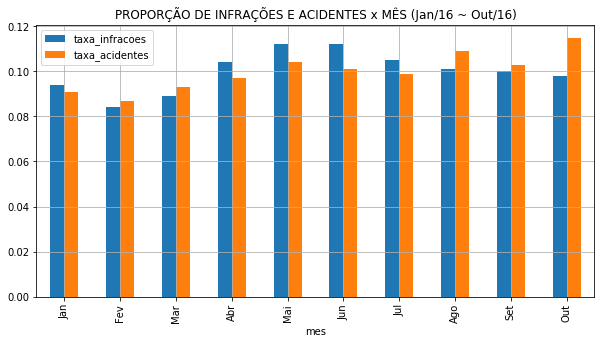

In [14]:
# Quantidade de acidentes (Jan/16 a Out/16)
qtdAcidentes2016 = acidentes2016.shape[0]

# Quantidade de infrações em 2016 (excluindo Novembro e Dezembro)
qtdMultas2016 = multas2016[(multas2016.mes != 'Nov') & (multas2016.mes != 'Dez')].shape[0]

meses = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out']

multasXmes2016 = multas2016.groupby('mes').size()
multasXmes2016 = multasXmes2016.reindex(meses)
multasXmes2016 = multasXmes2016.to_frame()
multasXmes2016.columns = ['qtd_infracoes']
acidentesXmes2016 = acidentesXmes2016.to_frame()
acidentesXmes2016.columns = ['qtd_acidentes']

# Adicionando nova coluna
multasXmes2016['taxa_infracoes'] = multasXmes2016['qtd_infracoes'].apply(lambda x: round(x/qtdMultas2016,3))
acidentesXmes2016['taxa_acidentes'] = acidentesXmes2016['qtd_acidentes'].apply(lambda x: round(x/qtdAcidentes2016,3))

# Excluindo coluna que já não será mais necessária
multasXmes2016.drop(['qtd_infracoes'], axis=1, inplace=True)
acidentesXmes2016.drop(['qtd_acidentes'], axis=1, inplace=True)

# Concatenando dataframes
taxa_maXmes2016 = pd.concat([multasXmes2016, acidentesXmes2016], axis=1)

# PLOT
taxa_maXmes2016.plot.bar(title='PROPORÇÃO DE INFRAÇÕES E ACIDENTES x MÊS (Jan/16 ~ Out/16)', grid=True, figsize=(10,5))

Percebemos que não há aparentemente nenhuma relação direta ou inversa entre as duas variáveis escolhidas. Para poder analisar com mais precisão aplicaremos uma técnica de aprendizagem chamada de regressão linear, com o intuito de verificar se há algum padrão na relação entre essas duas variáveis. Vamos calcular ainda a correlação entre elas para tirarmos alguma conclusão.

### 2.3 &mdash; Técnica de aprendizagem

--------MATRIZ DE CORRELAÇÃO--------


,taxa_infracoes,taxa_acidentes
taxa_infracoes,1.000000,0.521628
taxa_acidentes,0.521628,1.000000


 
-------------------------------REGRESSÃO LINEAR-------------------------------


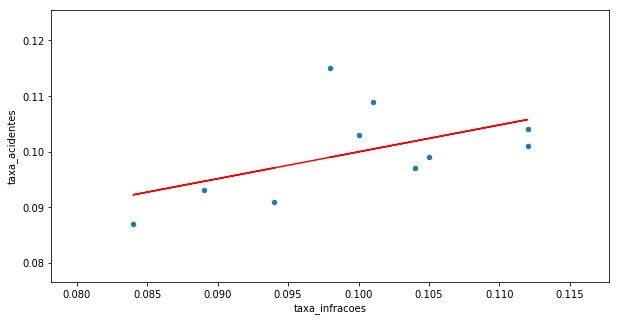

In [15]:
from scipy.stats import linregress

# Regressão Linear

X = taxa_maXmes2016['taxa_infracoes'].values.copy() # variável independente
y = taxa_maXmes2016['taxa_acidentes'].values # variável dependente

# Criando modelo de regressão linear
model = linregress(X,y)

# Coeficientes
b0 = model.intercept
b1 = model.slope 

# Scatter PLOTS
figs, ax = plt.subplots(1,1,figsize=(10,5))
taxa_maXmes2016[['taxa_infracoes','taxa_acidentes']].plot.scatter(x='taxa_infracoes', y='taxa_acidentes', ax=ax)
ax.plot(taxa_maXmes2016['taxa_infracoes'], taxa_maXmes2016['taxa_infracoes'].map(lambda x: b1*x+b0), color='red')

# Cálculo da matriz de correlação
print('--------MATRIZ DE CORRELAÇÃO--------')
display(taxa_maXmes2016.corr())

print(' ')
print('-------------------------------REGRESSÃO LINEAR-------------------------------')

#### Respondendo a pergunta 5

O registro de infrações ajuda a diminuir a quantidade de acidentes?

Não necessariamente. Analisando a regressão linear, observamos que existe uma tendência não muito grande de que, quando a taxa (ou proporção) de infrações cresce, a taxa (ou proporção) de acidentes também cresce. Logo, não é verdade que quanto mais infrações são registradas, menos acidentes acontecem.

Analisando a matriz de correlação, vemos que o coeficiente de correlação entre as duas variáveis escolhidas é de aproximadamente 0.52. Segundo o [Wikipedia](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson), um coeficiente de correlação de 0.5 a 0.7 positivo ou negativo indica uma correlação moderada. Para resposta da pergunta 5 ser sim, esse coeficiente deveria ser negativo, que indica que quando o valor de uma variável tende a crescer, o da outra tende a diminuir.